In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
dataset = pd.read_csv('C:/Salary_Data.csv', index_col=0)
dataset.head()

,YearsExperience,Salary
index,,
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891


In [58]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [59]:
dataset

,YearsExperience,Salary
index,,
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


In [60]:

dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [61]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0.5, 1.0, 'Salary')

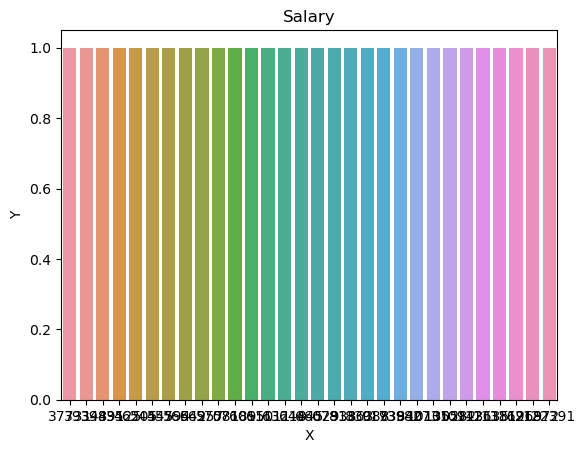

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = dataset, x="Salary")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Salary")

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in dataset.columns :
    dataset[i] = le.fit_transform(dataset[i])

In [64]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Salary',axis=1)
y = dataset['Salary']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)

In [65]:
import numpy as np

mean = np.mean(X_train, axis = 0)

std = np.std(X_train, axis = 0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [66]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [67]:
X_train = pd.DataFrame(X_train).fillna(0).values
X_test = pd.DataFrame(X_test).fillna(0).values

In [52]:
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))

False
False
False
False


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))  # 출력 노드를 1개로 변경

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 40)                80        
                                                                 
 dense_13 (Dense)            (None, 40)                1640      
                                                                 
 dense_14 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [76]:
N_EPOCHS = 1200

history = model.fit(X_train, y_train, epochs = N_EPOCHS, batch_size=64, validation_split=0.2)

Epoch 1/1200
1/1 [==============================] - 0s 184ms/step - loss: 2.8724 - mae: 1.3158 - val_loss: 5.4880 - val_mae: 2.0486
Epoch 2/1200
1/1 [==============================] - 0s 82ms/step - loss: 2.7800 - mae: 1.3780 - val_loss: 4.8155 - val_mae: 1.9669
Epoch 3/1200
1/1 [==============================] - 0s 82ms/step - loss: 2.7325 - mae: 1.3406 - val_loss: 5.2702 - val_mae: 2.0349
Epoch 4/1200
1/1 [==============================] - 0s 73ms/step - loss: 2.7114 - mae: 1.3501 - val_loss: 5.1257 - val_mae: 2.0135
Epoch 5/1200
1/1 [==============================] - 0s 79ms/step - loss: 2.6946 - mae: 1.3483 - val_loss: 5.2246 - val_mae: 2.0339
Epoch 6/1200
1/1 [==============================] - 0s 79ms/step - loss: 2.6901 - mae: 1.3444 - val_loss: 5.1550 - val_mae: 2.0297
Epoch 7/1200
1/1 [==============================] - 0s 98ms/step - loss: 2.6879 - mae: 1.3401 - val_loss: 5.2715 - val_mae: 2.0478
Epoch 8/1200
1/1 [==============================] - 0s 86ms/step - loss: 2.6861 - 

In [77]:
model.fit(X_train, y_train, epochs=100, batch_size=120, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 68ms/step - loss: 10.2955 - mae: 2.1153


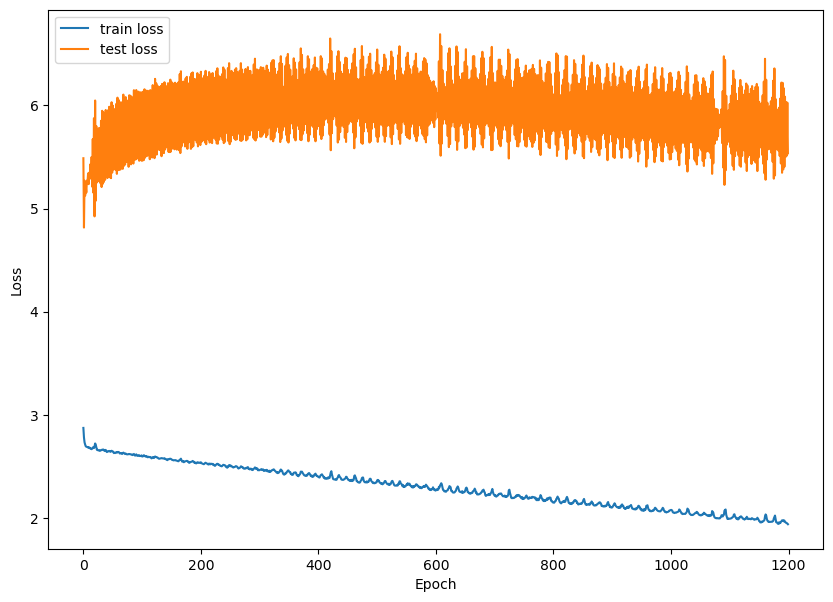

In [78]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

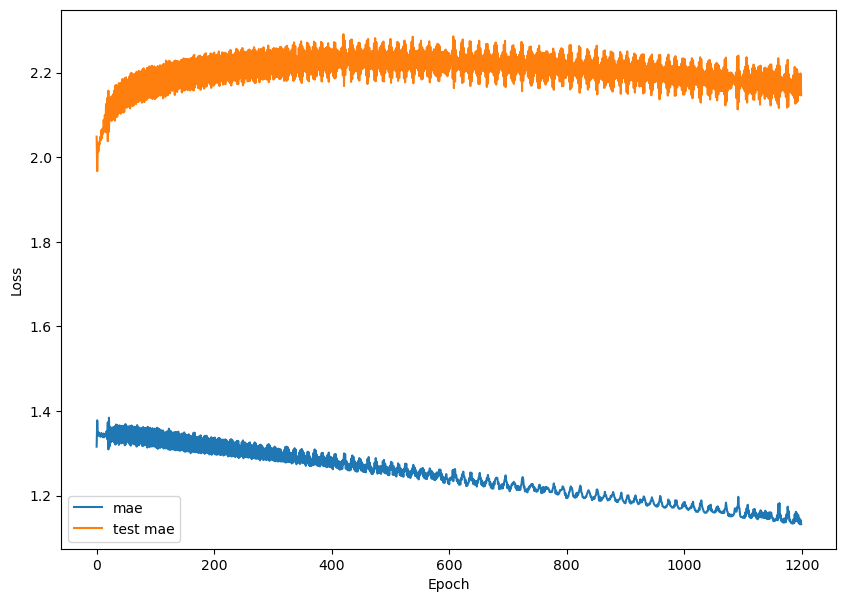

In [79]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mae'], label='mae')
plt.plot(range(N_EPOCHS), history.history['val_mae'], label='test mae')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

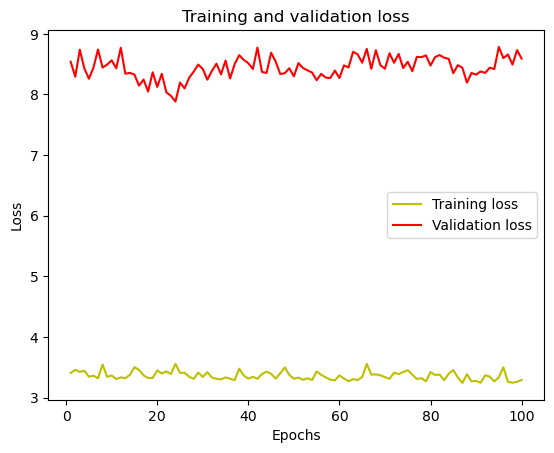

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()